In [352]:
import os
import math
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

### Import data

In [553]:
dataset = np.load('./data_processed/chunk1.npy')

In [554]:
df = pd.DataFrame(dataset)
df 

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-546.363194,116.986956,-4.861569,51.700080,15.538524,6.019769,37.343437,18.527990,5.205468,15.114531,...,1.648100,0.822641,-1.030715,0.558009,0.137724,-0.978016,-0.147688,0.907830,-1.749435,b'bus'
1,-562.017570,128.086304,1.552109,56.674744,13.191814,46.531231,-2.868772,10.101376,9.949976,4.952168,...,-0.963068,-0.579091,-0.028036,-0.470492,-0.176212,-0.179167,-0.697224,0.134356,-0.502883,b'park'
2,-768.048558,90.002034,28.859072,48.151764,33.930091,34.649997,8.017895,14.876892,13.486202,13.566324,...,1.140748,0.320619,0.226141,0.448586,0.703261,0.170229,0.553997,0.205054,0.235601,b'library'
3,-536.729254,83.950984,-14.513036,72.052425,-7.748932,36.995510,10.646910,24.491250,18.679747,13.051731,...,-0.827044,-0.007084,-0.236357,0.034784,0.025573,0.257708,0.144899,-0.363672,-0.432049,b'beach'
4,-443.741002,113.668029,6.103396,82.082974,26.549264,42.370981,0.746439,16.298728,6.385143,4.087002,...,-0.651513,-0.621321,-0.197123,-0.064164,0.692588,-0.386767,-0.201101,-0.731063,-0.040211,b'beach'
5,-468.450291,115.821716,2.043111,56.358352,-1.442755,34.461003,5.048660,7.414895,16.730959,-0.538833,...,0.539715,0.501159,-0.684723,-0.097873,0.526374,-0.177490,0.088637,-0.254302,-0.684588,b'bus'
6,-707.201215,128.927180,-2.365219,25.880709,25.907057,22.191652,13.830554,19.210379,12.877421,5.947068,...,-0.408910,-0.467706,0.005861,0.471435,0.152756,-0.182363,-0.734640,-0.679044,-1.041173,b'home'
7,-802.639168,81.669201,24.638036,22.457644,10.252188,18.402375,14.254640,7.424408,13.344056,1.284894,...,-0.477893,-0.224564,-0.069185,0.006891,-0.334939,0.217100,0.534579,0.056415,-0.158931,b'home'
8,-598.451064,94.106364,-18.453055,52.278969,-33.771214,54.581154,11.496161,-10.596063,26.305748,2.282023,...,-0.125229,-0.829289,-0.474966,-0.032922,0.292558,0.226530,0.764035,0.880042,0.493589,b'residential_area'
9,-515.373734,151.919879,-65.159910,37.123366,9.475245,32.048897,8.191691,16.825710,18.698969,-7.216457,...,0.814644,-0.462986,-0.119109,0.082351,0.376746,0.119994,0.156064,-0.188792,-0.262887,b'city_center'


In [555]:
df['class'].dtypes

dtype('O')

### Decoding class to string

In [556]:
df['class'] = df['class'].str.decode("utf-8")

### Check the classes

In [557]:
df['class'].unique()

array(['bus', 'park', 'library', 'beach', 'home', 'residential_area',
       'city_center', 'metro_station', 'cafe/restaurant', 'train',
       'grocery_store', 'car', 'forest_path', 'tram', 'office'], dtype=object)

In [454]:
df.groupby("class").size()

class
beach               6731
bus                 6642
cafe/restaurant     6745
car                 6664
city_center         6762
forest_path         6598
grocery_store       6631
home                6523
library             6708
metro_station       6700
office              6559
park                6748
residential_area    6649
train               6641
tram                6699
dtype: int64

### Check NA values

In [455]:
df_1 = df
df_1.dropna(how='any')

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-546.363194,116.986956,-4.861569,51.700080,15.538524,6.019769,37.343437,18.527990,5.205468,15.114531,...,1.648100,0.822641,-1.030715,0.558009,0.137724,-0.978016,-0.147688,0.907830,-1.749435,bus
1,-562.017570,128.086304,1.552109,56.674744,13.191814,46.531231,-2.868772,10.101376,9.949976,4.952168,...,-0.963068,-0.579091,-0.028036,-0.470492,-0.176212,-0.179167,-0.697224,0.134356,-0.502883,park
2,-768.048558,90.002034,28.859072,48.151764,33.930091,34.649997,8.017895,14.876892,13.486202,13.566324,...,1.140748,0.320619,0.226141,0.448586,0.703261,0.170229,0.553997,0.205054,0.235601,library
3,-536.729254,83.950984,-14.513036,72.052425,-7.748932,36.995510,10.646910,24.491250,18.679747,13.051731,...,-0.827044,-0.007084,-0.236357,0.034784,0.025573,0.257708,0.144899,-0.363672,-0.432049,beach
4,-443.741002,113.668029,6.103396,82.082974,26.549264,42.370981,0.746439,16.298728,6.385143,4.087002,...,-0.651513,-0.621321,-0.197123,-0.064164,0.692588,-0.386767,-0.201101,-0.731063,-0.040211,beach
5,-468.450291,115.821716,2.043111,56.358352,-1.442755,34.461003,5.048660,7.414895,16.730959,-0.538833,...,0.539715,0.501159,-0.684723,-0.097873,0.526374,-0.177490,0.088637,-0.254302,-0.684588,bus
6,-707.201215,128.927180,-2.365219,25.880709,25.907057,22.191652,13.830554,19.210379,12.877421,5.947068,...,-0.408910,-0.467706,0.005861,0.471435,0.152756,-0.182363,-0.734640,-0.679044,-1.041173,home
7,-802.639168,81.669201,24.638036,22.457644,10.252188,18.402375,14.254640,7.424408,13.344056,1.284894,...,-0.477893,-0.224564,-0.069185,0.006891,-0.334939,0.217100,0.534579,0.056415,-0.158931,home
8,-598.451064,94.106364,-18.453055,52.278969,-33.771214,54.581154,11.496161,-10.596063,26.305748,2.282023,...,-0.125229,-0.829289,-0.474966,-0.032922,0.292558,0.226530,0.764035,0.880042,0.493589,residential_area
9,-515.373734,151.919879,-65.159910,37.123366,9.475245,32.048897,8.191691,16.825710,18.698969,-7.216457,...,0.814644,-0.462986,-0.119109,0.082351,0.376746,0.119994,0.156064,-0.188792,-0.262887,city_center


In [456]:
df_1.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-563.045776,128.289140,0.929733,40.261893,7.427249,27.314829,6.706253,11.059276,10.164697,3.620941,...,0.002287,-0.003849,0.003539,-0.003232,-0.002008,-0.005086,0.005015,-0.002105,0.000364,-0.001059
std,107.707262,31.127973,26.631801,14.624264,15.176482,10.097731,11.522480,8.328018,8.352303,7.600074,...,0.636644,0.626545,0.616789,0.609815,0.603632,0.600334,0.593762,0.588322,0.586641,0.581049
min,-850.993757,-108.262795,-109.612891,-29.543754,-66.380459,-32.036983,-50.478691,-36.913964,-36.574435,-40.963593,...,-6.724944,-3.710221,-6.300818,-3.802532,-3.852229,-3.131844,-3.632522,-3.773857,-5.645920,-3.904433
25%,-635.823246,110.723124,-17.378966,31.523508,-2.940075,20.641538,-1.016564,5.592116,4.680422,-1.348323,...,-0.413491,-0.413185,-0.402363,-0.406569,-0.400859,-0.403072,-0.384709,-0.392519,-0.387651,-0.384142
50%,-551.302645,131.506493,-1.076070,40.948712,6.142018,27.236360,6.604398,11.026781,10.208249,3.707604,...,0.001262,-0.004255,0.001113,-0.002793,-0.001154,-0.007133,0.003906,0.000569,0.001321,0.001640
75%,-487.536404,148.574315,18.157068,49.964574,16.965401,33.891498,14.391539,16.608224,15.664185,8.643199,...,0.417641,0.407835,0.410938,0.398118,0.397666,0.392742,0.397194,0.389669,0.388947,0.383782
max,-101.249533,269.511566,103.502604,123.160912,84.639720,82.063256,66.850272,71.031996,52.689333,44.446383,...,6.915189,3.481261,4.050057,3.462754,2.919022,4.283516,3.777060,3.282056,3.616336,3.200220


### Classical values to numeric values

In [457]:
class2num = {"class":     {"bus": 0, "cafe/restaurant": 1, "car": 2, "city_center": 3, "forest_path": 4, 
                              "grocery_store": 5, "home": 6, "beach": 7, "library": 8, "metro_station": 9, 
                              "office": 10, "residential_area": 11, "train": 12, "tram": 13, "park": 14}}

In [458]:
df.replace(class2num, inplace=True)

### Splitting into train and test data

In [459]:
train, test = train_test_split(df, test_size=0.2)

In [460]:
train.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,-562.954729,128.258421,0.929920,40.286221,7.426924,27.313467,6.685080,11.072364,10.174324,3.617567,...,-0.004259,0.003617,-0.003521,-0.002948,-0.005256,0.003982,-0.001590,0.001236,-0.000991,7.005375
std,107.731455,31.071432,26.650031,14.634839,15.174927,10.096138,11.538735,8.324766,8.344756,7.598837,...,0.626849,0.616682,0.611499,0.603643,0.599686,0.593107,0.588104,0.587217,0.583144,4.327653
min,-849.066781,-108.262795,-109.612891,-29.543754,-66.380459,-32.036983,-50.478691,-35.012606,-36.574435,-40.963593,...,-3.710221,-6.300818,-3.802532,-3.852229,-2.984743,-3.632522,-3.773857,-5.645920,-3.904433,0.000000
25%,-635.938048,110.668427,-17.350847,31.543817,-2.929114,20.635139,-1.021337,5.601974,4.679183,-1.349804,...,-0.413293,-0.401539,-0.407699,-0.401375,-0.402606,-0.384971,-0.391307,-0.387073,-0.385816,3.000000
50%,-551.349584,131.517191,-1.102364,40.975097,6.151243,27.223006,6.609941,11.044985,10.240423,3.715640,...,-0.003592,0.000934,-0.003130,-0.001873,-0.008560,0.001789,0.001251,0.001829,0.000842,7.000000
75%,-487.362235,148.517386,18.188894,49.978191,16.983589,33.885572,14.380604,16.624778,15.695122,8.650544,...,0.408948,0.410242,0.398705,0.396635,0.391165,0.394640,0.390310,0.390918,0.385018,11.000000
max,-101.249533,269.511566,103.502604,101.825366,84.639720,82.063256,66.850272,51.091467,52.689333,44.446383,...,3.481261,4.050057,3.462754,2.919022,4.283516,3.035658,3.282056,3.616336,3.200220,14.000000


### Generalization (data for testing overfitting)

In [461]:
data_generalize = np.load('./data_processed/chunk2.npy')

In [462]:
df2 = pd.DataFrame(data_generalize)
df2 

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-555.033660,156.260047,53.188852,45.890061,29.233242,18.834702,10.586072,4.673495,6.849898,1.595365,...,-0.670690,0.433702,0.554958,0.301008,0.402883,0.381016,0.463730,0.185018,0.118679,b'tram'
1,-457.964462,137.472620,7.329515,61.414611,2.031792,36.264513,-7.737711,27.665471,11.812067,-5.266753,...,-0.712292,-0.111612,-0.032551,-0.303526,0.047999,-0.259638,-0.825487,-0.576322,-0.023958,b'grocery_store'
2,-698.445600,83.234155,-12.046344,53.915978,22.896169,26.830175,-5.744056,10.453306,12.894421,-4.813808,...,0.352511,0.242898,0.561219,0.198272,0.118671,-0.433992,-0.088854,-0.257253,-0.204386,b'home'
3,-571.895086,165.587902,4.558360,43.797552,6.088004,28.877840,7.115879,11.093110,28.277775,6.729370,...,0.727826,-0.033646,0.636957,0.084618,0.348369,-0.161284,-0.809711,-0.367827,0.627349,b'bus'
4,-626.990093,137.790561,38.799677,50.828330,30.355678,32.403573,21.261511,14.336188,12.430275,3.137841,...,0.855415,-0.558852,-0.265965,0.168139,0.045416,0.196652,0.261141,0.821635,0.112981,b'car'
5,-525.455567,144.408859,-16.444643,45.066950,21.411431,34.004996,-9.233609,16.800173,22.628278,3.358321,...,-0.021010,0.861008,0.321247,0.626507,0.155840,-0.267418,0.341440,0.168140,0.409192,b'city_center'
6,-609.866961,101.594315,-5.306796,52.470851,5.085973,31.967074,5.656319,18.200641,2.222016,0.377425,...,-0.599506,-0.770915,-0.448589,0.195339,0.532650,0.482260,-0.236346,0.454346,0.459986,b'library'
7,-763.820613,113.000682,20.795399,35.740114,4.815410,25.392227,9.110860,14.907862,2.858930,1.413886,...,0.512194,0.485803,-0.358991,-1.522526,-0.496978,-0.780849,0.601001,-1.280703,0.020728,b'forest_path'
8,-684.333963,96.720452,-20.642034,49.971799,10.239982,24.499936,-15.116010,13.716621,19.758139,4.059688,...,-0.556045,-0.856371,-0.661066,-0.970376,-0.911174,-0.287963,0.668731,0.808799,0.671088,b'office'
9,-521.421031,145.531071,38.536505,46.702597,23.074885,26.155638,23.276045,16.340277,17.087924,2.288556,...,-0.628583,-0.347525,0.229387,0.261861,-0.351823,0.162175,0.084112,0.311294,0.106273,b'train'


In [463]:
df2['class'] = df2['class'].str.decode("utf-8")

In [464]:
df2.replace(class2num, inplace=True)

In [465]:
train_generalize, test_generalize = train_test_split(df2, test_size=0.2)

In [466]:
test_generalize.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-564.486174,128.052470,1.157146,40.063292,7.321053,27.302765,6.689201,11.069511,10.233286,3.626731,...,0.000799,0.014636,0.012546,0.010354,-0.001746,0.003785,-0.004883,0.000275,-0.001132,6.970850
std,109.008278,31.289597,26.694326,14.681825,15.230454,10.135005,11.465630,8.341422,8.349075,7.516893,...,0.620334,0.615387,0.607596,0.604871,0.597955,0.595089,0.584911,0.586276,0.579602,4.304419
min,-840.429019,-31.261393,-95.856734,-20.772287,-56.791270,-23.264363,-46.135489,-29.517951,-32.334370,-37.164345,...,-3.286805,-3.548682,-3.036806,-3.056827,-2.743457,-2.746905,-2.283058,-3.634097,-3.826251,0.000000
25%,-639.522038,110.347736,-17.328463,31.177398,-3.147434,20.703323,-1.069925,5.634029,4.691047,-1.275521,...,-0.408731,-0.390194,-0.387132,-0.392495,-0.394696,-0.389304,-0.395384,-0.387104,-0.381443,3.000000
50%,-552.739976,131.450747,-0.543442,40.549566,5.976152,27.361514,6.566533,11.015683,10.222062,3.684036,...,-0.004899,0.012745,0.012713,0.008994,0.002559,0.005580,-0.004317,-0.001227,-0.003933,7.000000
75%,-487.841208,148.563159,18.728913,49.934175,16.863534,33.883957,14.359296,16.557891,15.811558,8.577392,...,0.410722,0.425041,0.410496,0.412672,0.391353,0.400538,0.383929,0.389658,0.380330,11.000000
max,-90.561505,244.483420,91.957471,92.215914,78.824094,76.714199,49.675872,49.210291,42.800194,39.035722,...,3.750794,2.781714,2.728522,3.500004,3.093614,2.589629,2.434723,2.530942,3.201706,14.000000


## Navie Bayes Classifier

In [14]:
X_nb = train.drop('class', axis=1).values
Y_nb = train['class'].values

In [15]:
pd.DataFrame(X_nb)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-511.314111,142.951735,18.919290,44.039806,21.689305,24.281291,3.275758,24.562527,23.762129,-1.127197,...,0.412084,0.850205,0.908774,0.550736,-0.719351,-0.990697,-0.160495,0.303042,-0.617882,-0.527599
1,-725.397488,138.772443,15.828363,28.575326,-2.826224,34.143254,10.350039,16.475952,12.827414,10.225807,...,-0.548210,0.349754,0.813573,0.345732,-0.015776,-0.272026,0.170939,0.386400,0.305560,0.091280
2,-476.106393,61.112228,-9.700715,44.527135,-8.111568,21.707106,-7.782622,-4.293643,-5.404995,3.107260,...,-0.223740,-0.632909,-0.158687,-0.078239,0.179956,0.220975,-0.404054,-0.055432,1.086510,1.136572
3,-638.200081,149.794934,53.569173,29.697917,38.563913,32.449333,23.694819,20.645163,19.179251,17.060303,...,0.045852,-0.179931,0.361128,0.046072,-0.849412,-0.582779,-0.046829,0.014425,0.409397,0.869803
4,-602.107126,68.040082,-1.999192,45.801073,2.188586,24.609383,4.217015,9.789469,22.120443,9.400652,...,-0.064717,-0.789548,-0.135511,0.811097,-0.283370,-1.215230,0.213070,1.144037,0.629640,-0.541296
5,-509.037951,137.591414,-9.505233,46.858269,3.892685,19.758294,-17.966497,2.069893,-1.196795,-10.511223,...,0.235444,-0.518774,0.035936,-0.274741,-0.953063,-0.464174,0.432380,0.600735,1.155660,0.325943
6,-555.611887,139.212802,7.623532,52.010300,12.395686,35.897148,16.619724,13.555512,18.369801,14.268638,...,-1.665177,-0.074454,0.272878,-1.566074,0.070285,0.469788,0.273901,-0.482931,-1.045513,0.040389
7,-358.407979,141.373858,-24.778570,23.367873,-17.139933,13.565967,-29.480112,1.258015,-8.318089,-4.429378,...,-0.112647,0.619185,1.041531,0.213106,-1.422402,-1.765148,0.224510,-0.093195,-0.204467,-0.208137
8,-564.896412,73.756000,17.099966,39.479407,6.480377,20.241007,0.389287,6.122488,12.159678,-2.808117,...,-0.364923,0.838364,-0.647886,-0.723403,-0.678996,-0.449466,0.425637,0.126030,1.011633,0.362493
9,-398.724660,127.673105,-8.839982,42.064238,13.405397,36.334262,19.626094,22.063209,15.697028,1.948974,...,0.611181,-0.111764,-0.088316,0.005419,-0.464872,0.287384,1.158011,0.325044,-0.605628,-1.039058


In [16]:
clf_nb = GaussianNB(priors=None)
clf_nb.fit(X_nb, Y_nb)

GaussianNB(priors=None)

In [17]:
y_true_nb = test['class'].values
y_pred_nb = clf_nb.predict(test.drop('class', axis=1).values)

In [18]:
accuracy_score(y_true_nb, y_pred_nb)

0.5343

### Cross Validation - NB

In [558]:
clf_nb_cv = GaussianNB(priors=None)

In [559]:
scores_nb = cross_val_score(clf_nb_cv, df.drop('class', axis=1).values, df['class'], cv=4)
scores_nb                                           

array([ 0.53057389,  0.53163747,  0.52546102,  0.53180763])

In [560]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_nb.mean(), scores_nb.std() * 2))

Accuracy: 0.530 (+/- 0.01)


### Overfitting Detection - NB

In [561]:
y_true_nb_overfitting = test_generalize['class'].values
y_pred_nb_overfitting = clf_nb.predict(test_generalize.drop('class', axis=1).values)

In [562]:
accuracy_score(y_true_nb_overfitting, y_pred_nb_overfitting)

0.52844999999999998

### Feature Normalization - NB

In [353]:
X_nb_normalize = train.drop('class', axis=1).values
# normalization from 1- to 1
scaler = MinMaxScaler(feature_range=(-1,1))
X_nb_normalize = scaler.fit_transform(X_nb_normalize[:,:60])

Y_nb_normalize = train['class'].values

In [354]:
pd.DataFrame(X_nb_normalize)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.093879,0.329971,0.206221,0.120257,0.166331,-0.012828,-0.083697,0.139023,0.351871,-0.067172,...,-0.092053,0.235156,0.470726,0.198375,-0.143405,-0.422510,-0.062828,0.155598,0.085705,-0.049402
1,-0.664962,0.307845,0.177214,-0.115179,-0.158335,0.160037,0.036892,-0.010803,0.106873,0.198675,...,-0.253313,0.089676,0.451305,0.141941,0.077702,-0.228677,0.026633,0.179226,0.285104,0.124816
2,0.000041,-0.103301,-0.062366,0.127676,-0.228330,-0.057950,-0.272199,-0.395618,-0.301633,0.031984,...,-0.198825,-0.195983,0.252969,0.025230,0.139213,-0.095710,-0.128569,0.053988,0.453734,0.419071
3,-0.432357,0.366200,0.531396,-0.098088,0.389806,0.130345,0.264368,0.066443,0.249190,0.358715,...,-0.153553,-0.064303,0.359009,0.059450,-0.184279,-0.312491,-0.032147,0.073789,0.307525,0.343974
4,-0.336076,-0.066623,0.009910,0.147071,-0.091922,-0.007077,-0.067652,-0.134689,0.315089,0.179353,...,-0.172121,-0.241518,0.257696,0.270047,-0.006393,-0.483069,0.038005,0.393978,0.355082,-0.053258
5,-0.087807,0.301593,-0.060531,0.163166,-0.069354,-0.092109,-0.445794,-0.277715,-0.207346,-0.286913,...,-0.121716,-0.162804,0.292671,-0.028864,-0.216853,-0.280502,0.097201,0.239979,0.468666,0.190875
6,-0.212046,0.310177,0.100215,0.241602,0.043253,0.190780,0.143766,-0.064912,0.231053,0.293344,...,-0.440883,-0.033641,0.341006,-0.384344,0.104748,-0.028602,0.054425,-0.067186,-0.006634,0.110490
7,0.314010,0.321618,-0.203865,-0.194459,-0.347895,-0.200651,-0.642056,-0.292758,-0.366902,-0.144498,...,-0.180170,0.167999,0.497808,0.105432,-0.364348,-0.631388,0.041093,0.043284,0.174974,0.040528
8,-0.236813,-0.036362,0.189147,0.050828,-0.035085,-0.083648,-0.132900,-0.202630,0.091913,-0.106533,...,-0.222534,0.231714,0.153174,-0.152372,-0.130723,-0.276535,0.095381,0.105424,0.437566,0.201164
9,0.206462,0.249084,-0.054288,0.090180,0.056625,0.198442,0.195012,0.092717,0.171169,0.004861,...,-0.058619,-0.044487,0.267324,0.048259,-0.063432,-0.077798,0.293064,0.161834,0.088351,-0.193381


In [355]:
clf_nb_normalize = GaussianNB(priors=None)
clf_nb_normalize.fit(X_nb_normalize, Y_nb_normalize)

GaussianNB(priors=None)

In [356]:
test_nb_normalize = test.drop('class', axis=1).values
test_nb_normalize = scaler.transform(test_nb_normalize)

In [357]:
y_true_nb_normalize = test['class'].values
y_pred_nb_normalize = clf_nb_normalize.predict(test_nb_normalize)

In [358]:
accuracy_score(y_true_nb_normalize, y_pred_nb_normalize)

0.5343

### 4-fold Cross Validation - NB normalization

In [593]:
clf_nb_normalize_cv = GaussianNB(priors=None)
scores_nb_normalize = cross_val_score(clf_nb_normalize_cv, test_nb_normalize, y_true_nb_normalize, cv=4)
scores_nb_normalize                                              

array([ 0.51967246,  0.53029394,  0.53490698,  0.51772481])

In [594]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_nb_normalize.mean(), scores_nb_normalize.std() * 2))

Accuracy: 0.526 (+/- 0.01)


## k - Nearest Neighbors Classification

In [539]:
X_knn = train.drop('class', axis=1).values
Y_knn = train['class'].values

In [540]:
start = timeit.default_timer()

#clf_knn = KNeighborsClassifier(weights = 'distance', n_neighbors=9)
clf_knn = KNeighborsClassifier(n_neighbors = 7)
clf_knn.fit(X_knn, Y_knn)

stop = timeit.default_timer()

In [541]:
print("KNeighborsClassifier training time:\t" + str(stop - start))

KNeighborsClassifier training time:	1.02654586895369


In [542]:
start = timeit.default_timer()

y_true_knn = test['class'].values
y_pred_knn = clf_knn.predict(test.drop('class', axis=1).values)

stop = timeit.default_timer()

In [543]:
print("KNeighborsClassifier testing time:\t" + str(stop - start))

KNeighborsClassifier testing time:	50.68630343605764


In [544]:
accuracy_score(y_true_knn, y_pred_knn)

0.75590000000000002

### Cross Validation - KNN

In [567]:
clf_knn_cv = KNeighborsClassifier(n_neighbors=7)

In [568]:
scores_knn = cross_val_score(clf_knn_cv, df.drop('class', axis=1).values, df['class'].values, cv=4)
scores_knn  

array([ 0.7534893 ,  0.75401968,  0.74722989,  0.75530127])

In [569]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.753 (+/- 0.01)


### Parameter Tuning with Cross Validation - KNN

In [530]:
# creating odd list of K for KNN
KList = list(range(1,100))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, KList))

# empty list that will hold cv scores
cv_scores_knn_1 = []

In [531]:
# perform 4-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df.drop('class', axis=1).values, df['class'], cv=4, scoring='accuracy')
    cv_scores_knn_1.append(scores.mean())

In [532]:
# changing to misclassification error
MSE_1 = [1 - x for x in cv_scores_knn_1]

In [537]:
cv_scores_knn_1[MSE_1.index(min(MSE_1))]

0.75347006195054123

In [533]:
# determining best k
optimal_k_1 = neighbors[MSE_1.index(min(MSE_1))]
print("The optimal number of neighbors is %d" % optimal_k_1)

The optimal number of neighbors is 7


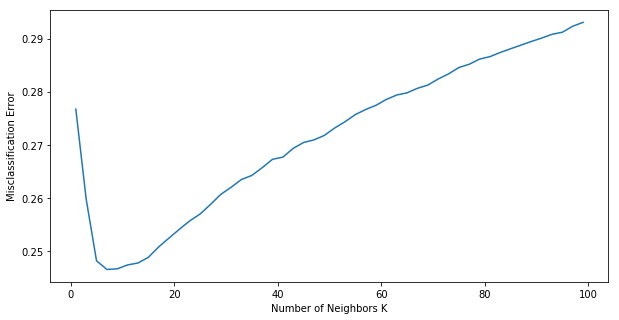

In [534]:
# plot misclassification error vs k
plt.figure(figsize=(10,5))
plt.plot(neighbors, MSE_1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Overfitting Detection - KNN

In [545]:
y_true_knn_overfitting = test_generalize['class'].values
y_pred_knn_overfitting = clf_knn.predict(test_generalize.drop('class', axis=1).values)

In [546]:
accuracy_score(y_true_knn_overfitting, y_pred_knn_overfitting)

0.75749999999999995

### Outlier Detection - KNN

#### Using the Isolation Forest Algorithm

In [243]:
X_knn_outlier = train.drop('class', axis=1).values
Y_knn_outlier = train['class'].values

test_knn_outlier = test.drop('class',axis=1).values
test_knn_outlier_class = test['class'].values

In [244]:
rng = np.random.RandomState(58)
# fit the outlier model
knn_outlier = IsolationForest(max_samples=100, random_state=rng)
knn_outlier.fit(X_knn_outlier)

y_knn_outlier_pred_train = knn_outlier.predict(X_knn_outlier)
y_knn_outlier_pred_test = knn_outlier.predict(test_knn_outlier)

In [245]:
X_knn_outlier = X_knn_outlier[np.where(np.array(y_knn_outlier_pred_train)>0)]
Y_knn_outlier = Y_knn_outlier[np.where(np.array(y_knn_outlier_pred_train)>0)]

test_knn_outlier = test_knn_outlier[np.where(np.array(y_knn_outlier_pred_test)>0)]
test_knn_outlier_class = test_knn_outlier_class[np.where(np.array(y_knn_outlier_pred_test)>0)]

In [576]:
start = timeit.default_timer()

clf_knn_outlier = KNeighborsClassifier(n_neighbors=7)
clf_knn_outlier.fit(X_knn_outlier, Y_knn_outlier)

stop = timeit.default_timer()

In [577]:
print("KNeighbors Classifier testing time:\t" + str(stop - start))

KNeighbors Classifier testing time:	0.6971920890500769


In [578]:
start = timeit.default_timer()

y_true_knn_outlier = test_knn_outlier_class
y_pred_knn_outlier = clf_knn_outlier.predict(test_knn_outlier)

stop = timeit.default_timer()

In [579]:
print("KNeighbors Classifier testing time:\t" + str(stop - start))

KNeighbors Classifier testing time:	34.74181065300945


In [580]:
accuracy_score(y_true_knn_outlier, y_pred_knn_outlier)

0.77532942088362311

### Cross Validation - KNN outlier

In [581]:
clf_knn_outlier_cv = KNeighborsClassifier(n_neighbors=7)

In [582]:
scores_knn_outlier = cross_val_score(clf_knn_outlier_cv, X_knn_outlier, Y_knn_outlier, cv=4)
scores_knn_outlier  

array([ 0.76652227,  0.76565017,  0.77214135,  0.76952148])

In [595]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_knn_outlier.mean(), scores_knn_outlier.std() * 2))

Accuracy: 0.768 (+/- 0.01)


### Feature Normalization - KNN

In [584]:
X_knn_normalize = train.drop('class', axis=1).values
# normalize from 0 to 1
scaler_knn = MinMaxScaler()
X_knn_normalize = scaler_knn.fit_transform(X_knn_normalize[:,:60])

Y_knn_normalize = train['class'].values

In [585]:
pd.DataFrame(X_knn_normalize)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.519597,0.660237,0.631488,0.637340,0.593966,0.523063,0.557756,0.516814,0.554463,0.559864,...,0.527073,0.506838,0.520620,0.460772,0.622874,0.487980,0.588032,0.500489,0.549857,0.586481
1,0.603031,0.680536,0.389869,0.519611,0.445434,0.538654,0.699275,0.587102,0.777769,0.638173,...,0.452748,0.458940,0.518754,0.486843,0.551572,0.457257,0.593750,0.549208,0.660430,0.546376
2,0.051382,0.664231,0.729240,0.560607,0.725094,0.595301,0.564624,0.543538,0.591679,0.650101,...,0.477413,0.304674,0.556230,0.625826,0.618996,0.329721,0.691768,0.655898,0.631218,0.560231
3,0.366083,0.658807,0.427262,0.402508,0.264897,0.570823,0.636472,0.582703,0.590748,0.523099,...,0.558906,0.577628,0.629137,0.517137,0.619457,0.544934,0.610412,0.504572,0.549531,0.396316
4,0.422529,0.686067,0.290118,0.488966,0.511419,0.764243,0.510782,0.486291,0.622808,0.569484,...,0.470701,0.620734,0.701726,0.637393,0.631711,0.339501,0.605691,0.447034,0.523323,0.614699
5,0.207544,0.679854,0.452659,0.336322,0.422987,0.369755,0.488107,0.407793,0.350257,0.476795,...,0.463334,0.379103,0.626879,0.618533,0.549323,0.382463,0.561523,0.476306,0.543671,0.581994
6,0.425582,0.686926,0.345907,0.499229,0.445861,0.520007,0.487311,0.528244,0.428984,0.406034,...,0.448023,0.463870,0.573042,0.514439,0.621958,0.200628,0.246178,0.489815,0.655061,0.572455
7,0.575417,0.630354,0.424044,0.716181,0.635702,0.488145,0.573094,0.975821,0.504875,0.284645,...,0.500564,0.331493,0.546460,0.530652,0.510262,0.521350,0.582691,0.575961,0.613259,0.555115
8,0.190433,0.612333,0.529297,0.421884,0.458480,0.312280,0.403649,0.518093,0.429015,0.415638,...,0.600630,0.566192,0.592683,0.541287,0.454381,0.284264,0.619915,0.549506,0.539416,0.515531
9,0.604492,0.633617,0.327933,0.543674,0.445701,0.592919,0.420339,0.572805,0.696616,0.569428,...,0.502330,0.552054,0.592453,0.623964,0.611440,0.270356,0.465155,0.534395,0.650111,0.616882


In [586]:
start = timeit.default_timer()

clf_knn_normalize = KNeighborsClassifier(n_neighbors=27)
clf_knn_normalize.fit(X_knn_normalize, Y_knn_normalize)

stop = timeit.default_timer()

In [587]:
print("KNeighbors Classifier training time:\t" + str(stop - start))

KNeighbors Classifier training time:	0.904850248945877


In [588]:
test_knn_normalize = test.drop('class', axis=1).values
test_knn_normalize = scaler_knn.transform(test_knn_normalize)

In [590]:
start = timeit.default_timer()

y_true_knn_normalize = test['class'].values
y_pred_knn_normalize = clf_knn_normalize.predict(test_knn_normalize)

stop = timeit.default_timer()

In [591]:
print("KNeighbors Classifier testing time:\t" + str(stop - start))

KNeighbors Classifier testing time:	575.539268489927


In [592]:
accuracy_score(y_true_knn_normalize, y_pred_knn_normalize)

0.55974999999999997

### 4-fold Cross Validation - KNN normalization

In [597]:
knn_normalize_classifier = KNeighborsClassifier(n_neighbors=27)
scores_knn_normalize = cross_val_score(clf_knn_normalize, test_knn_normalize, y_true_knn_normalize, cv=4)
scores_knn_normalize  

array([ 0.51119105,  0.49880048,  0.4944989 ,  0.51071071])

In [598]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_knn_normalize.mean(), scores_knn_normalize.std() * 2))

Accuracy: 0.504 (+/- 0.01)


### Parameter Tuning with Cross Validation - KNN

In [516]:
# creating odd list of K for KNN
KList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, KList))

# empty list that will hold cv scores
cv_scores_knn = []

In [517]:
# perform 4-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, test_knn_normalize, y_true_knn_normalize, cv=4, scoring='accuracy')
    cv_scores_knn.append(scores.mean())

In [522]:
cv_scores_knn[MSE.index(min(MSE))]

0.52385365496212288

In [518]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores_knn]

In [519]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 27


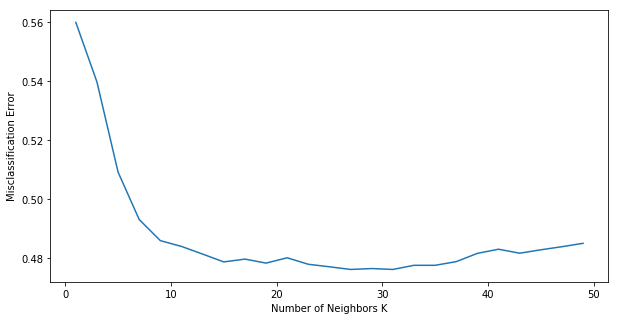

In [520]:
# plot misclassification error vs k
plt.figure(figsize=(10,5))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Nearest Centroid Classifier

In [425]:
X_nc = train.drop('class', axis=1).values
Y_nc = train['class'].values

In [431]:
clf_nc = NearestCentroid(metric='manhattan', shrink_threshold=None)
clf_nc.fit(X_nc, Y_nc)

NearestCentroid(metric='manhattan', shrink_threshold=None)

In [432]:
start = timeit.default_timer()

y_true_nc = test['class'].values
y_pred_nc = clf_nc.predict(test.drop('class', axis=1).values)

stop = timeit.default_timer()

In [433]:
print("Nearest centroid Classifier testing time:\t" + str(stop - start))

Nearest centroid Classifier testing time:	0.06095057097263634


In [434]:
accuracy_score(y_true_nc, y_pred_nc)

0.37964999999999999

### 4-fold Cross Validation - NC

In [599]:
clf_nc_cv = NearestCentroid(metric='manhattan', shrink_threshold=None)

In [600]:
scores_nc = cross_val_score(clf_nc_cv, df.drop('class', axis=1).values, df['class'].values, cv=4)
scores_nc  

array([ 0.37960408,  0.37393009,  0.37805512,  0.38049132])

In [601]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nc.mean(), scores_nc.std() * 2))

Accuracy: 0.38 (+/- 0.01)


## Radius Neighbors Classifier

In [547]:
X_rn = train.drop('class', axis=1).values
Y_rn = train['class'].values

In [548]:
clf_rn = RadiusNeighborsClassifier(radius=100.0)
clf_rn.fit(X_rn, Y_rn)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=100.0,
             weights='uniform')

In [549]:
start = timeit.default_timer()

y_true_rn = test['class'].values
y_pred_rn = clf_rn.predict(test.drop('class', axis=1).values)

stop = timeit.default_timer()

In [550]:
print("Radius Neighbors Classifier testing time:\t" + str(stop - start))

Radius Neighbors Classifier testing time:	794.2892529920209


In [551]:
accuracy_score(y_true_rn, y_pred_rn)

0.28389999999999999

### Cross Validation - RN

In [513]:
test.drop('class', axis=1).values.shape

(20000, 60)

In [514]:
clf_rn_cv = RadiusNeighborsClassifier(radius=100.0)
scores_rn = cross_val_score(clf_rn_cv, df.drop('class', axis=1).values, df['class'].values, cv=4)
scores_rn  

array([ 0.07034373,  0.07037185,  0.07041408,  0.07047047])

In [515]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rn.mean(), scores_rn.std() * 2))

Accuracy: 0.07 (+/- 0.00)


### Outlier Detection - RN

#### Isolation Forest Algorithm

In [192]:
X_rn_outlier = train.drop('class', axis=1).values
Y_rn_outlier = train['class'].values

test_rn_outlier = test.drop('class',axis=1).values
test_rn_outlier_class = test['class'].values

In [193]:
rng = np.random.RandomState(42)
# fit the model
clf_outlier = IsolationForest(max_samples=100, random_state=rng)
clf_outlier.fit(X_rn)

y_rn_outlier_pred_train = clf_outlier.predict(X_rn_outlier)
y_rn_outlier_pred_test = clf_outlier.predict(test_rn_outlier)

In [194]:
X_rn_outlier = X_rn_outlier[np.where(np.array(y_rn_outlier_pred_train)>0)]
Y_rn_outlier = Y_rn_outlier[np.where(np.array(y_rn_outlier_pred_train)>0)]

test_rn_outlier = test_rn_outlier[np.where(np.array(y_rn_outlier_pred_test)>0)]
test_rn_outlier_class = test_rn_outlier_class[np.where(np.array(y_rn_outlier_pred_test)>0)]

In [232]:
clf_rn_outlier = RadiusNeighborsClassifier(radius=77.5)
clf_rn_outlier.fit(X_rn_outlier, Y_rn_outlier)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=77.5,
             weights='uniform')

In [233]:
start = timeit.default_timer()

y_true_rn_outlier = test_rn_outlier_class
y_pred_rn_outlier = clf_rn_outlier.predict(test_rn_outlier)

stop = timeit.default_timer()

In [234]:
print("Radius Neighbors Classifier testing time:\t" + str(stop - start))

Radius Neighbors Classifier testing time:	253.03442395792808


In [235]:
accuracy_score(y_true_rn_outlier, y_pred_rn_outlier)

0.37427673995701771

### Cross Validation - RN

In [236]:
y_pred_rn_outlier.shape

(18147,)

In [237]:
clf_rn_outlier_cv = RadiusNeighborsClassifier(radius=77.5)
scores_rn_outlier = cross_val_score(clf_rn_outlier_cv, test_rn_outlier, y_true_rn_outlier, cv=4)
scores_rn_outlier  

array([ 0.36107442,  0.36660057,  0.37045204,  0.37122048])

In [238]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rn_outlier.mean(), scores_rn_outlier.std() * 2))

Accuracy: 0.37 (+/- 0.01)


### Parameter Tuning with Cross Validation - RN (100-1000)

In [503]:

# subsetting just the odd ones
radius = list([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# empty list that will hold cv scores
cv_scores_rn = []

In [504]:
# perform 4-fold cross validation
for r in radius:
    rn = RadiusNeighborsClassifier(radius=r)
    scores = cross_val_score(rn, test.drop('class', axis=1).values, y_true_rn, cv=4, scoring='accuracy')
    cv_scores_rn.append(scores.mean())

In [505]:
# changing to misclassification error
MSE_rn = [1 - x for x in cv_scores_rn]

In [506]:
# determining best k
optimal_k_rn = radius[MSE_rn.index(min(MSE_rn))]
print("The optimal number of radius is %d" % optimal_k_rn)

The optimal number of radius is 100


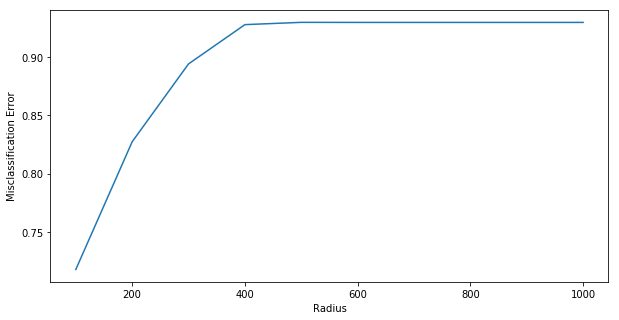

In [507]:
# plot misclassification error vs k
plt.figure(figsize=(10,5))
plt.plot(radius, MSE_rn)
plt.xlabel('Radius')
plt.ylabel('Misclassification Error')
plt.show()

### Parameter Tuning with Cross Validation - RN (10-100)

In [496]:
# creating odd list of K for KNN
RList = list(range(1,50))

# subsetting just the odd ones
radius = list([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# empty list that will hold cv scores
cv_scores_rn = []

In [497]:
# perform 4-fold cross validation
for r in radius:
    try:
        rn = RadiusNeighborsClassifier(radius=r)
        scores = cross_val_score(rn, test.drop('class', axis=1).values, y_true_rn, cv=4, scoring='accuracy')
        cv_scores_rn.append(scores.mean())
    except(ValueError):
        cv_scores_rn.append(0.0)

In [498]:
# changing to misclassification error
MSE_rn = [1 - x for x in cv_scores_rn]
MSE_rn

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7179498090887888]

In [502]:
# determining best k
optimal_k_rn = radius[MSE_rn.index(min(MSE_rn))]
print("The optimal number of radius is %d" % optimal_k_rn)

The optimal number of radius is 100


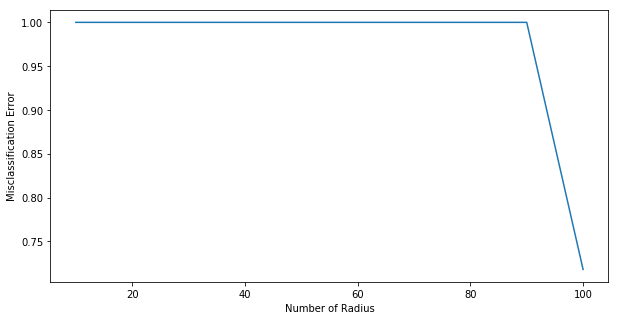

In [500]:
# plot misclassification error vs k
plt.figure(figsize=(10,5))
plt.plot(radius, MSE_rn)
plt.xlabel('Number of Radius')
plt.ylabel('Misclassification Error')
plt.show()

## Gaussian Mixture Model

In [337]:
X_gmm = train.drop('class', axis=1).values
Y_gmm = train['class'].values

In [338]:
clf_gmm = GaussianMixture(n_components=1, n_init=10)
clf_gmm.fit(X_gmm, Y_gmm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=10, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [339]:
start = timeit.default_timer()

y_true_gmm = test['class'].values
y_pred_gmm = clf_gmm.predict(test.drop('class', axis=1).values)

stop = timeit.default_timer()

In [340]:
print("Gaussian Mixture Model testing time:\t" + str(stop - start))

GMM testing time:	0.07477316202130169


In [341]:
accuracy_score(y_true_gmm, y_pred_gmm)

0.066049999999999998